In [1]:
#import of libraries 
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
#Downloading of dataset
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv

--2021-03-18 13:21:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  96.5KB/s    in 0.7s    

2021-03-18 13:21:06 (96.5 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
#Reading the data 
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#descrbing data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
#here now we are not using all the parameters for first time but using some of them for prediction
ds=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
ds.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Here the co2emission is dependent variable while others are indepent variavble 
SO the equation of single simple linear regression
 ŷ =  θ0 +  θ1X1;
 where ŷ= Independent variable, 
 x1=independent variable, 
 θ0,θ1 are parameters .
 so above model this equation is :- 
 CO2EMISSIONS = θ0 + θ1 X ENGINESIZE

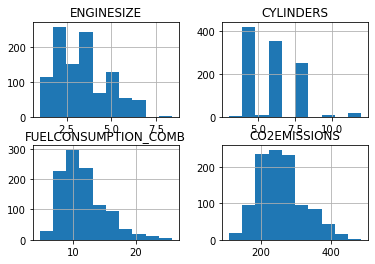

In [6]:
#NOW ploat all the parameters
viz = ds[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

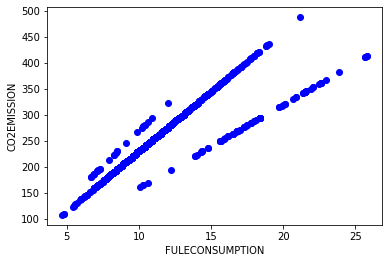

In [7]:
#now we plot one feature vs EMission in scatterplot
plt.scatter(ds.FUELCONSUMPTION_COMB,ds.CO2EMISSIONS,color='blue')
plt.xlabel("FULECONSUMPTION")
plt.ylabel("CO2EMISSION")
plt.show()

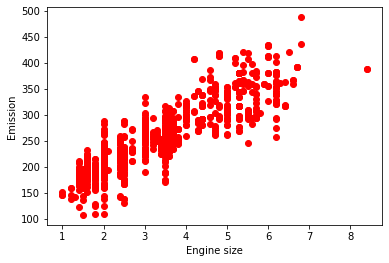

In [8]:
#now create scatterploat for antor featurs 
plt.scatter(ds.ENGINESIZE, ds.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

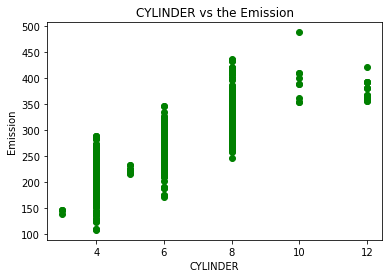

In [9]:
plt.scatter(ds.CYLINDERS,ds.CO2EMISSIONS,color='green')
plt.title('CYLINDER vs the Emission')
plt.xlabel('CYLINDER')
plt.ylabel('Emission')
plt.show()

<b>now the main part comes model creation and its training </b> 


<h3> the training and testing is important because it incresace the accuracy of model </h3>

In [10]:
#now splitting data in trainig and testing part
msk = np.random.rand(len(ds)) <0.8 #here  we are takinging any random amount which is less than 80% of total dataset
train_ds = ds[msk]
test_ds = ds[~msk]

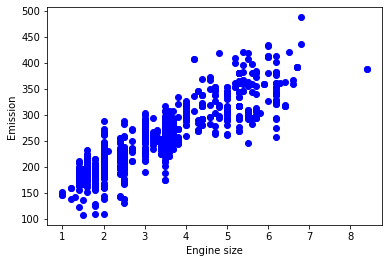

In [11]:
#here we are ploting training dataset
plt.scatter(train_ds.ENGINESIZE, train_ds.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

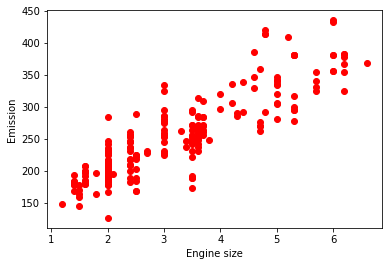

In [12]:
#here we are ploating testing dataset
plt.scatter(test_ds.ENGINESIZE, test_ds.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [13]:
from sklearn import linear_model
#here we are creating linear_model using sklearin 

In [19]:
model = linear_model.LinearRegression()
train_x = np.asanyarray(train_ds[['ENGINESIZE']])
train_y = np.asanyarray(train_ds[['CO2EMISSIONS']])
#here we created body of regression model 
#here we trained x and y in form of any dimenssion array 

In [20]:
model.fit(train_x,train_y)
#here we fit the training data in model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#the coefficents 
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)


Coefficients:  [[38.57918942]]
Intercept:  [126.51687607]


Text(0, 0.5, 'Emission')

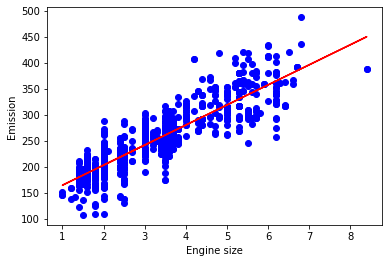

In [23]:
#here now we plot the line 
plt.scatter(train_ds.ENGINESIZE, train_ds.CO2EMISSIONS,  color='blue')
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
#here we fitted fit line in scatterplot diagrame
#here θ0 is intercept and θ1 is coefficient of model 


In [ ]:
#here the model evlaution begins 
#we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.
#There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
#here some important terms for evaluations is as below
# 1. Mean absolute error :- it is mean of all absolute values of the errors 
# 2. Mean squared error :- it is squre of all mean values of error 
# 3 . root mean squared error :- it is square root of mean squared error 
"""4 .R2/R-Squared score :- R-squared is not error, but is a popular metric for accuracy of your model. 
It represents how close the data are to the fitted regression line. 
The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [24]:
from sklearn.metrics import r2_score


In [33]:
test_x = np.asanyarray(test_ds[['ENGINESIZE']])
test_y = np.asanyarray(test_ds[['CO2EMISSIONS']])
test_y_hat = model.predict(test_x)
print("Mean absolute error : %.2f" %np.mean(np.absolute(test_y_hat-test_y)))
print("Mean squared error : %.2f" %np.mean((test_y_hat-test_y)**2))
print("R-2 score : %.2f" %r2_score(test_y_hat,test_y))

Mean absolute error : 23.59
Mean squared error : 1049.81
R-2 score : 0.63
